In [50]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt     
from imblearn.combine import SMOTEENN

In [51]:
df = pd.read_csv('tel_churn.csv')

In [52]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,2,0,53.85,108.15,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [53]:
df = df.drop('Unnamed: 0', axis = 1)

In [54]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [55]:
#Creating Independent and Dependent variables

x = df.drop('Churn', axis = 1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,1,1,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0
7028,0,103.20,7362.90,0,1,1,1,0,1,1,...,0,1,1,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
7030,1,74.40,306.60,1,1,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,0


In [56]:
y = df['Churn']

In [57]:
#Splitting into test and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# DecisionTreeClassifier

In [58]:
#model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [59]:
#model_dt.fit(x_train, y_train)

In [60]:
#y_pred = model_dt.predict(x_test)

In [61]:
#y_pred

In [62]:
#print(classification_report(y_test, y_pred, labels=[0,1]))

In [63]:
#print(confusion_matrix(y_test, y_pred))

# Random Forest Classifier

In [64]:
model_rf = RandomForestClassifier(criterion='gini', min_samples_leaf=8, max_depth=6)

In [65]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8)

In [66]:
y_pred = model_rf.predict(x_test)

In [67]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1039
           1       0.71      0.47      0.57       368

    accuracy                           0.81      1407
   macro avg       0.77      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [69]:
print(confusion_matrix(y_test, y_pred))

[[968  71]
 [195 173]]


### Data is imbalanced so accuracy here won't show us the true performance of our model.
### So we need to consider precision,recall.

## Making dataset balance with SMOTEENN

In [70]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [71]:
x_trainb, x_testb, y_trainb, y_testb = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [72]:
model_rf_smote = RandomForestClassifier(criterion='gini', min_samples_leaf=40, max_depth=6)

In [73]:
model_rf_smote.fit(x_trainb, y_trainb)

RandomForestClassifier(max_depth=6, min_samples_leaf=40)

In [74]:
y_pred_b = model_rf_smote.predict(x_testb)

In [75]:
y_pred_b

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [76]:
print(classification_report(y_testb, y_pred_b, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       535
           1       0.91      0.95      0.93       641

    accuracy                           0.92      1176
   macro avg       0.92      0.92      0.92      1176
weighted avg       0.92      0.92      0.92      1176



In [77]:
cm = confusion_matrix(y_testb, y_pred_b)

In [78]:
print(cm)

[[476  59]
 [ 32 609]]


In [79]:
print('Accuracy: {}'.format(model_rf_smote.score(x_testb, y_testb)))

Accuracy: 0.9226190476190477


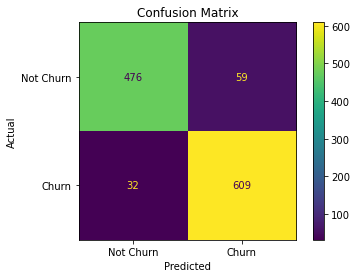

In [80]:
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])

cmd_obj.plot()

cmd_obj.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted', 
                ylabel='Actual')

plt.show()

### Precision and Recall are very good for balanced dataset.

### Saving Model

In [81]:
import pickle as pk

In [82]:
pk.dump(model_rf_smote, open('model_rf.sav', 'wb'))